### Color threshold and blue screen
It is useful for selecting area of interest

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
image = cv2.imread('images/pizza_bluescreen.jpg')
print("This image is :", type(image),
     "with dimension:",image.shape)

This image is : <class 'numpy.ndarray'> with dimension: (514, 816, 3)


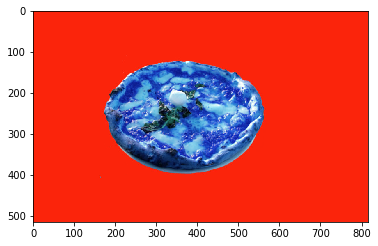

In [5]:
%matplotlib inline
plt.imshow(image)

#### Here actually opencv read image in BGR format making red very less important But nowdays we see everything in RGB so we convert it

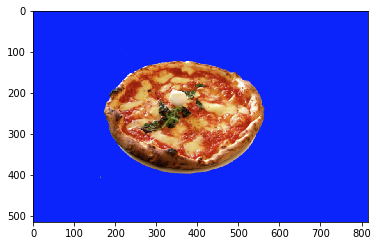

In [6]:
#if we do copy then any transformation won't affect original img
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Define color threshold

In [12]:
lower_value = np.array([0,0,230]) #it is ok to have red and green channel 0
upper_value = np.array([100,100,255])

### Create a mask

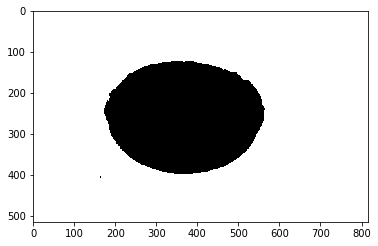

In [13]:
mask = cv2.inRange(image_copy,lower_value,upper_value)

plt.imshow(mask,cmap='gray')

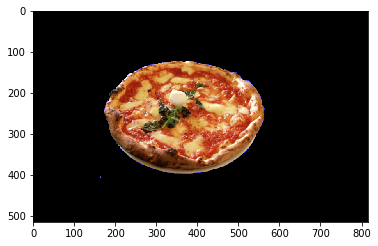

In [14]:
masked_image = np.copy(image_copy)

masked_image[mask!=0] = [0,0,0]
#here mask !== 0 means area of masked_image where above mask has no black color
#and then assign it to be black in masked image
plt.imshow(masked_image)

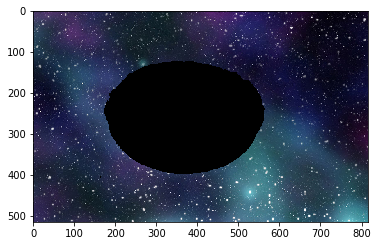

In [15]:
background_image = cv2.imread("images/space_background.jpg")
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)

background_image = background_image[0:514,0:816]
#it is to crop the backgroud image into pizza image
background_image[mask==0] = [0,0,0]

plt.imshow(background_image)



In [16]:
complete_image = background_image + masked_image

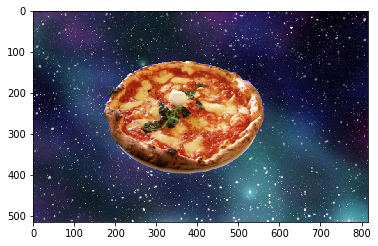

In [17]:
plt.imshow(complete_image)